In [4]:
import RMS_utils
train_dir, validation_dir, class_weight = RMS_utils.prep_dir("RMS H&E Big/")

No. ARMS Train: 3268
No. ERMS Train: 3216
No. ARMS Validation: 1354
No. ERMS Validation: 1539


In [2]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras import layers, models, activations

conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten (Flatten)            (None, 13824)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              14156800  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 69,018,849
Trainable params: 68,958,305
Non-trainable params: 60,544
_______________________________________

In [3]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model.compile(optimizer = Adam(lr=0.00007), 
              loss = 'binary_crossentropy', 
              metrics = ['AUC'])

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range = 90,
                                   width_shift_range = .0,
                                   height_shift_range = .5,
                                   shear_range = .5,
                                   zoom_range = .5,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='wrap')


train_generator, validation_generator = RMS_utils.prep_datagen(train_dir, validation_dir, train_datagen, 48, 150)

Found 6482 images belonging to 2 classes.
Found 2891 images belonging to 2 classes.


In [4]:
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              #steps_per_epoch = steps,
                              epochs = 5,
                              #validation_steps = steps,
                              verbose = 1,
                              class_weight=class_weight
                              #callbacks = [learning_rate_reduction]
                              #callbacks=[tensorboard_callback]
                   )

Epoch 1/5
136/136 [==============================] - 130s 953ms/step - loss: 0.4906 - auc: 0.8491 - val_loss: 0.6437 - val_auc: 0.7834
Epoch 2/5
136/136 [==============================] - 117s 862ms/step - loss: 0.3113 - auc: 0.9384 - val_loss: 0.7574 - val_auc: 0.8302
Epoch 3/5
136/136 [==============================] - 119s 873ms/step - loss: 0.2760 - auc: 0.9519 - val_loss: 0.5248 - val_auc: 0.8514
Epoch 4/5
136/136 [==============================] - 119s 878ms/step - loss: 0.2542 - auc: 0.9582 - val_loss: 0.5792 - val_auc: 0.8549
Epoch 5/5
136/136 [==============================] - 119s 878ms/step - loss: 0.2339 - auc: 0.9654 - val_loss: 0.6392 - val_auc: 0.8205


Text(0.5, 1.0, 'Training and Validation loss')

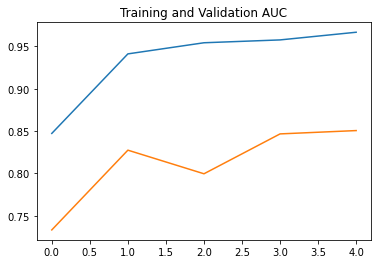

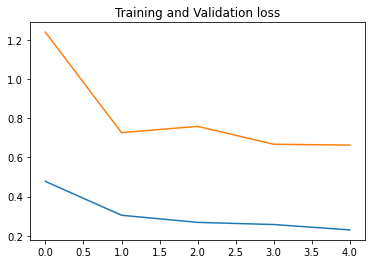

In [22]:
RMS_utils.show_results(history, save = False)

In [5]:
RMS_utils.show_preds(model, validation_generator)

Confusion Matrix
[[1145  208]
 [ 452 1086]]
              precision    recall  f1-score   support

        ARMS       0.72      0.85      0.78      1353
        ERMS       0.84      0.71      0.77      1538

    accuracy                           0.77      2891
   macro avg       0.78      0.78      0.77      2891
weighted avg       0.78      0.77      0.77      2891



In [24]:
#Save Model to use in visualisations and get auc
import pickle

#model.save('results Saved Model - H&E No Norm ')
with open('Saved Model History - H&E Norm', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)